<a href="https://colab.research.google.com/github/uto4ka101/First/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Music_Recommendation_System_(Data_Processing_and_Analysis)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Music Recommendation System (Data Processing and Analysis)

### Framing the Problem

This project is aimed upon building a music recommendation system that gives the user recommendations on music based on his music taste by analysing his previously heard music and playlist. This project is done in two ways, using 'User - to - User Recommendation' and 'Item - to - Item Recommendation'. Birch, MiniBatchKMeans and KMeans algorithms are being used along with 'Surprise' module to compute the similarity between recommendations and user's already existing playlist for evaluation

### Obtaining Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as ms
%matplotlib inline
!pip install -q xlrd
!git clone https://github.com/mdeff/fma.git


Cloning into 'fma'...
remote: Enumerating objects: 823, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 823 (delta 6), reused 12 (delta 4), pack-reused 808
Receiving objects: 100% (823/823), 4.08 MiB | 18.84 MiB/s, done.
Resolving deltas: 100% (528/528), done.


In [ ]:
url="https://drive.google.com/uc?export=download&id=1kfrYsB-BY0ch-rjAKPT6ULfrqRTuXzlv"
#echonest = pd.read_csv('https://drive.google.com/file/d/10bnRHudf_-GsDHmI27YZzXvQEZ9YmJIo/view?usp=sharing')
genres=pd.read_csv(url)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 2000)

#### Analysing Data

In [ ]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


#### Feature Engineering

In [ ]:
def convert_to_float(df, columns):
    for i in columns:
        df[i] = df[i].astype('float')
    return df

#### Analysing Data

#### Feature Engineering

In [ ]:
def combine_two_rows(df):
    columns = list(df.columns)
    for i in range(0, 519):
        columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns

#### Analysing Data

In [ ]:
def combine_one_row(df):
    columns = list(df.columns)
    for i in range(0, 53):
        if i == 0:
            columns[i] = df.iloc[0, i]
        else:
            columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns

In [ ]:
genres.info()

In [ ]:
def getList(cd):
    return cd[1:-1].split(',')

### Working with 'Genre' dataset

#### Analysing Data

In [ ]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


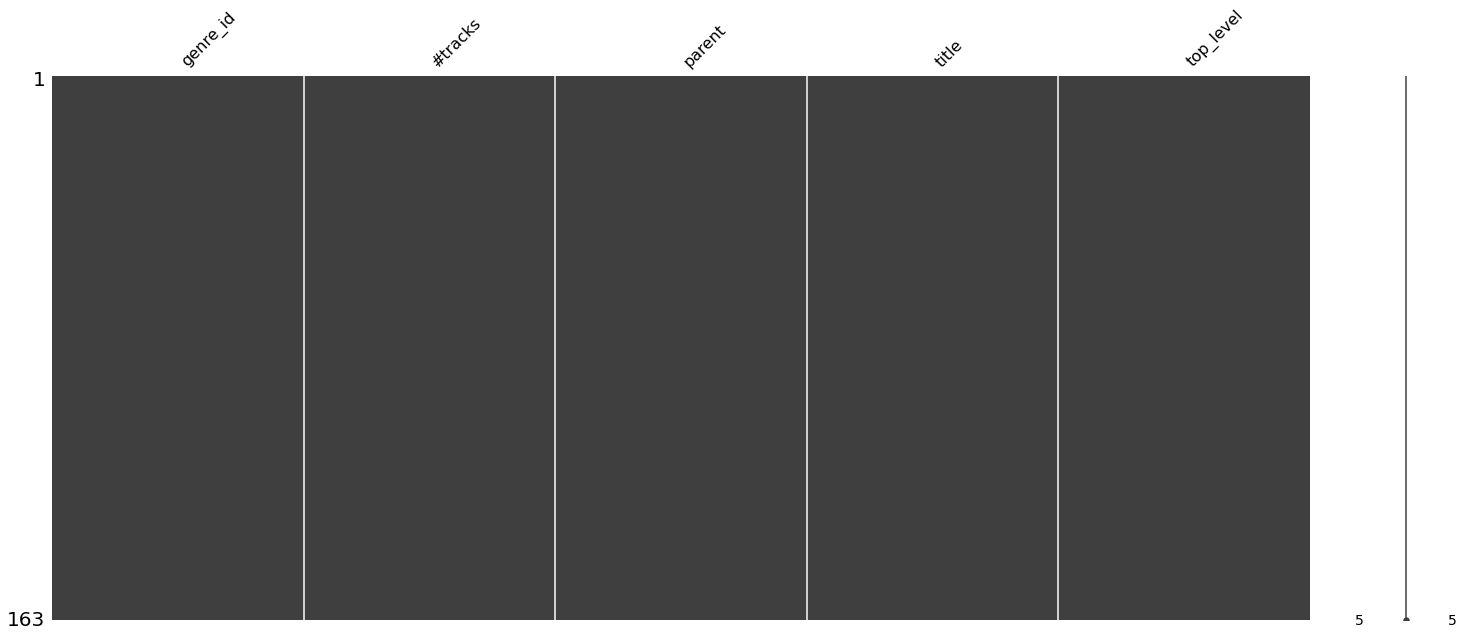

In [ ]:
ms.matrix(genres)

In [ ]:
genres.head()

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


Nothing to engineer!

### Combining all datasets into a single entity

#### Analysing Data

In [ ]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


#### Feature Engineering

In [ ]:
features.columns = ['track_id'] + list(features.columns[1:])

In [ ]:
features.head()

In [ ]:
type(echonest['track_id'].iloc[0])

In [ ]:
echonest['track_id'] = echonest['track_id'].astype('int')
tracks['track_id'] = tracks['track_id'].astype('int')

In [ ]:
features.sort_values(by='track_id', inplace=True)
tracks.sort_values(by='track_id', inplace=True)
echonest.sort_values(by='track_id', inplace=True)

In [ ]:
features.head()

In [ ]:
tracks.head()

In [ ]:
count = 0
for i in range(0, 106574):
    if features['track_id'][i] == tracks['track_id'][i]:
        count += 1
    else:
        print(features['track_id'][i], tracks['track_id'][i])

In [ ]:
final = pd.concat([features, tracks.drop('track_id', axis=1)], axis=1)

In [ ]:
final.shape

In [ ]:
final.head()

In [ ]:
echonest.tail(3)

In [ ]:
echonest.drop(['artist_name', 'release'], axis=1, inplace=True)

In [ ]:
tracks.tail(3)

In [ ]:
features.head(1)

In [ ]:
final = echonest.merge(final, on='track_id')

In [ ]:
final.shape

In [ ]:
ms.matrix(final)

### Analysing Data

In [ ]:
final.head()

In [ ]:
final.shape

In [ ]:
final.info()

In [ ]:
final.drop('track.8 genres', axis=1, inplace=True)

In [ ]:
final.shape

In [ ]:
final.head()

In [ ]:
final['track.7 genre_top'].value_counts()

### Feature Engineering

In [ ]:
def format_strings(x):
    if '-' in x:
        return ''.join(x.split('-'))
    if x.find('/'):
        return '|'.join(x.split('/'))
    return x

In [ ]:
def modifyString(serie, val):
    for i in range(0, val):
        if serie[i] == 'Old-Time / Historic':
            serie[i] = 'OldTime|Historic'
    return serie

In [ ]:
metadata = pd.DataFrame()

In [ ]:
metadata.shape

(0, 0)

In [ ]:
metadata.tail()

""


In [ ]:
metadata.head()

""


In [ ]:
metadata.tail()

In [ ]:
metadata.head()

In [ ]:
genres['title'].count()

163

In [ ]:
genre_dummy = pd.DataFrame(data= np.zeros((13129, 163)), columns= list(genres['title'].unique()))

In [ ]:
genre_dummy.head()

,Avant-Garde,International,Blues,Jazz,Classical,Novelty,Comedy,Old-Time / Historic,Country,Pop,Disco,Rock,Easy Listening,Soul-RnB,Electronic,Sound Effects,Folk,Soundtrack,Funk,Spoken,Hip-Hop,Audio Collage,Punk,Post-Rock,Lo-Fi,Field Recordings,Metal,Noise,Psych-Folk,Krautrock,Jazz: Vocal,Experimental,Electroacoustic,Ambient Electronic,Radio Art,Loud-Rock,Latin America,Drone,Free-Folk,Noise-Rock,Psych-Rock,Bluegrass,Electro-Punk,Radio,Indie-Rock,Industrial,No Wave,Free-Jazz,Experimental Pop,French,Reggae - Dub,Afrobeat,Nerdcore,Garage,Indian,New Wave,Post-Punk,Sludge,African,Freak-Folk,Jazz: Out,Progressive,Alternative Hip-Hop,Death-Metal,Middle East,Singer-Songwriter,Ambient,Hardcore,Power-Pop,Space-Rock,Polka,Balkan,Unclassifiable,Europe,Americana,Spoken Weird,Interview,Black-Metal,Rockabilly,Easy Listening: Vocal,Brazilian,Asia-Far East,N. Indian Traditional,South Indian Traditional,Bollywood,Pacific,Celtic,Be-Bop,Big Band/Swing,British Folk,Techno,House,Glitch,Minimal Electronic,Breakcore - Hard,Sound Poetry,20th Century Classical,Poetry,Talk Radio,North African,Sound Collage,Flamenco,IDM,Chiptune,Musique Concrete,Improv,New Age,Trip-Hop,Dance,Chip Music,Lounge,Goth,Composed Music,Drum & Bass,Shoegaze,Kid-Friendly,Thrash,Synth Pop,Banter,Deep Funk,Spoken Word,Chill-out,Bigbeat,Surf,Radio Theater,Grindcore,Rock Opera,Opera,Chamber Music,Choral Music,Symphony,Minimalism,Musical Theater,Dubstep,Skweee,Western Swing,Downtempo,Cumbia,Latin,Sound Art,Romany (Gypsy),Compilation,Rap,Breakbeat,Gospel,Abstract Hip-Hop,Reggae - Dancehall,Spanish,Country & Western,Contemporary Classical,Wonky,Jungle,Klezmer,Holiday,Salsa,Nu-Jazz,Hip-Hop Beats,Modern Jazz,Turkish,Tango,Fado,Christmas,Instrumental
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
genre_list = pd.Series(data= genre_dummy.columns)

In [ ]:
genre_list = modifyString(genre_list, 163)

In [ ]:
genre_list = genre_list.apply(format_strings)

In [ ]:
genre_dummy.columns= genre_list

In [ ]:
# columns converted successfully

In [ ]:
genre_list = list(genre_list)

### Writing final data to .csv files

In [ ]:
import os

    
metadata.to_csv('/metadata.csv')
#final.to_csv('datasets/final/final.csv')